In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [2]:
data = pd.read_csv(r"../short-text-similarity/data/train.csv")
data.head()

,pid,sentence1,sentence2,label
0,4665,do you accept broadband bills,Broadband bill,1
1,26465,I am getting better fare for this flight,Check flight rate,0
2,57679,Flight from delhi to srinagar,check price for flight from mumbai to pune,1
3,22043,Availability of food,food available for guest,1
4,6522,This is my ID only,Can't find order ID.,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17044 entries, 0 to 17043
Data columns (total 4 columns):
pid          17044 non-null int64
sentence1    17044 non-null object
sentence2    17044 non-null object
label        17044 non-null int64
dtypes: int64(2), object(2)
memory usage: 532.8+ KB


In [4]:
data['label'].value_counts()

0    12650
1     4394
Name: label, dtype: int64

In [5]:
def word_count(sent):
    word_list = sent.split()
    stop_words = list(punctuation)
    word_list = [word for word in word_list if word not in stop_words]
    return len(word_list)

In [6]:
data['count1'] = data['sentence1'].apply(word_count)
data['count2'] = data['sentence2'].apply(word_count)

In [7]:
def match_words(sent1, sent2):
    stop_words = list(punctuation)
    sent1 = sent1.split()
    sent2 = sent2.split()
    sent1 = [word for word in sent1 if word not in stop_words]
    sent2 = [word for word in sent2 if word not in stop_words]
    num_match = 0
    for word1 in sent1:
        if word1 in sent2:
            num_match += 1
            
    return num_match

In [8]:
data['match_words'] = list(map(match_words, data['sentence1'], data['sentence2']))

In [9]:
data.head()

,pid,sentence1,sentence2,label,count1,count2,match_words
0,4665,do you accept broadband bills,Broadband bill,1,5,2,0
1,26465,I am getting better fare for this flight,Check flight rate,0,8,3,1
2,57679,Flight from delhi to srinagar,check price for flight from mumbai to pune,1,5,8,2
3,22043,Availability of food,food available for guest,1,3,4,1
4,6522,This is my ID only,Can't find order ID.,0,5,4,0


From the count of matching words we can observe the count of matching words for 1st row is 1, while we can see that there are 2 words matching, so we have to Lemmatize/Stem the sentences.

In [10]:
corp_sent1 = data['sentence1'].tolist()
corp_sent2 = data['sentence2'].tolist()

In [11]:
def cleaner(sent):
    stop_words = list(punctuation)
    tokens = word_tokenize(sent)
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    stem_tokens = [stemmer.stem(token) for token in tokens]
    
    return stem_tokens

In [12]:
sent1_clean = list(map(cleaner, data['sentence1']))
sent2_clean = list(map(cleaner, data['sentence2']))

In [13]:
def match_clean_words(sent1, sent2):
    num_match = 0
    for word1 in sent1:
        if word1 in sent2:
            num_match += 1
    return num_match

In [14]:
data['match_words'] = list(map(match_clean_words, sent1_clean, sent2_clean))

In [15]:
data.head()

,pid,sentence1,sentence2,label,count1,count2,match_words
0,4665,do you accept broadband bills,Broadband bill,1,5,2,2
1,26465,I am getting better fare for this flight,Check flight rate,0,8,3,1
2,57679,Flight from delhi to srinagar,check price for flight from mumbai to pune,1,5,8,3
3,22043,Availability of food,food available for guest,1,3,4,2
4,6522,This is my ID only,Can't find order ID.,0,5,4,1


Now we have better count of matching words in both sentences

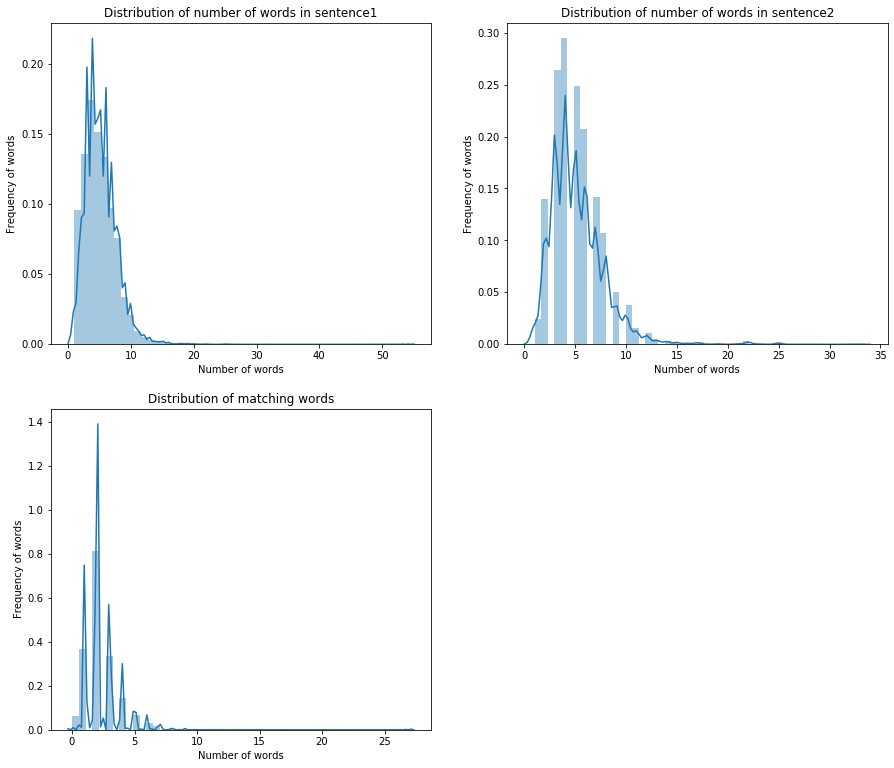

In [16]:
plt.figure(figsize = (15, 13))
plt.subplot(2, 2, 1)
sns.distplot(data['count1'])
plt.title('Distribution of number of words in sentence1')
plt.xlabel('Number of words')
plt.ylabel('Frequency of words')

plt.subplot(2, 2, 2)
sns.distplot(data['count2'])
plt.title('Distribution of number of words in sentence2')
plt.xlabel('Number of words')
plt.ylabel('Frequency of words')

plt.subplot(2, 2, 3)
sns.distplot(data['match_words'])
plt.title('Distribution of matching words')
plt.xlabel('Number of words')
plt.ylabel('Frequency of words')
plt.show()

In [17]:
print("Average number of words in sentence1 are", np.round(data['count1'].mean(), 2))

print("Average number of words in sentence2 are", np.round(data['count2'].mean(), 2))

print("Average number of words matching in sentence1 & sentence2 are", np.round(data['match_words'].mean(), 2))

print("Biggest sentence1 have", max(data['count1']), "words & number of words matching to sentence2 are", 
      data['match_words'][data['count1'].idxmax()])

print("Biggest sentence2 have", max(data['count2']), "words & number of words matching to sentence1 are", 
      data['match_words'][data['count2'].idxmax()])

Average number of words in sentence1 are 5.26
Average number of words in sentence2 are 5.19
Average number of words matching in sentence1 & sentence2 are 2.33
Biggest sentence1 have 54 words & number of words matching to sentence2 are 12
Biggest sentence2 have 33 words & number of words matching to sentence1 are 2


In [18]:
print("Average number of words in sentence1", np.round(data[data['label'] == 1]['count1'].mean(), 2),
      "& sentence2", np.round(data[data['label'] == 1]['count2'].mean(), 2),
      "having same sentences & number average number of matching words in between them are", 
     np.round(data[data['label'] == 1]['match_words'].mean(), 2))
print('*' * 25)
print("Average number of words in sentence1", np.round(data[data['label'] == 0]['count1'].mean(), 2),
      "& sentence2", np.round(data[data['label'] == 0]['count2'].mean(), 2),
      "having different sentences & number average number of matching words in between them are", 
     np.round(data[data['label'] == 0]['match_words'].mean(), 2))

Average number of words in sentence1 4.73 & sentence2 4.61 having same sentences & number average number of matching words in between them are 2.65
*************************
Average number of words in sentence1 5.45 & sentence2 5.39 having different sentences & number average number of matching words in between them are 2.22


We can see that the sentences have same meaning have more number of same words than sentences having different meaning. A better vectorization method for solving this problem will be using Word2Vec, because Word2Vec vectorizes words such that the words having similar meaning are close to each other.